Dataset openen (code van canvas)

In [2]:
import csv
from collections import Counter
import math
import matplotlib.pyplot as plt

filename = 'utrecht.csv'

columns = {}
rows = []
data = {}

# hulp functie om te kijken of de waarde een integer is
def is_number(s):
	try:
		int(s)
		return True
	except ValueError:
		return False

with open(filename) as csv_file:
	csv_reader = csv.reader(csv_file, delimiter=';')
	line_count = 0
	for row in csv_reader:
		# anders reageren als het de eerste regel is, dat zijn namelijk de kolomnamen
		if line_count == 0:
			line_count += 1
			i = 0
			for c in row:
				columns[c] = i
				data[i] = []
				i += 1
		else:
			line_count += 1
			# alleen importeren als het maanddata is, niet de cummulatieven over een jaar
			if 'JJ00' in row[columns['Perioden']]:
				pass
			else:
				rows.append(row)
				i = 0
				for c in row:
					if is_number(c):
						data[i].append(int(c))
					else:
						data[i].append(c)
					i = i+1
	print(f'Processed {line_count} lines.')

Processed 224 lines.


Functies voor het berekenen van gemiddelde, modus, mediaan en standaard deviatie

In [ ]:
# Gemiddelde berekenen
def calculate_average(info):
	count: int = len(info)
	average = sum(info)/count
	return average

# Modus berekenen
def calculate_mode(info):
	n = len(info)

	data = Counter(info)
	get_mode = dict(data)
	mode = [k for k, v in get_mode.items() if v == max(list(data.values()))]

	if len(mode) == n:
		get_mode = "Geen modus gevonden"
	else:
		get_mode = mode

	return get_mode

# Mediaan berekenen
def calculate_mean(collumn):
	valueCount = {} # Aantal keer voorkomen lijst

	for value in collumn: # Voor elke waarde in de kolom
		if value in valueCount.keys(): # Als de waarde al bestaat, plus 1 anders naar 1
			valueCount[value] += 1
		else:
			valueCount[value] = 1

	valueCountSorted = sorted(valueCount.items(), key=lambda kv: kv[1], reverse=True) # Sorteren op aantal keer in de lijst

	return valueCountSorted[0]

def calculate_standard_deviation(xs):
	mean = sum(xs) / len(xs)
	var  = sum(pow(x-mean,2) for x in xs) / len(xs)
	std  = math.sqrt(var)
	return std

Berekenen van de trendlijn

In [ ]:
def get_trendline(y):
	#x berekenen
	x = []
	for i in range(1, len(y)+1):
		x.append(i)

	#som van x en y berekenen
	sum_x = 0
	sum_y = 0
	for i in x:
		sum_x = sum_x + i
	for i in y:
		i = float(i)
		sum_y = sum_y + i

	#a berekenen
	sum_a = 0
	for i in range(len(x)):
		sub_a = x[i] * float(y[i])
		sum_a = sum_a + sub_a
	a = len(x) * sum_a

	#b berekenen
	b = sum_x * sum_y

	#c berekenen
	sum_c = 0
	for i in x:
		sum_c = sum_c + (i * i)
	c = len(x) * sum_c

	#d berekenen
	d = sum_x * sum_x

	#slope berekenen
	slope = (a - b) / (c - d)

	#e berekenen
	e = sum_y

	#f berekenen
	f = slope * sum_x

	#y-intercept berekenen
	y_intercept = (e - f) / len(x)

	#trendlijn berekenen
	new_y = []
	for i in x:
		new_y.append((slope * i) + y_intercept)
	return new_y

Functie voor het printen van alle data in één keer

In [ ]:
def all_data(data_name):
	# Gemiddelde, modus, mediaan en standaarddeviatie
	print(data_name)
	info = data[columns[data_name]][-12:-1]
	print(info)
	print("Gemiddelde:", calculate_average(info))
	print("Modus:", calculate_mode(info))
	print("Mediaan:", calculate_mean(info))
	print("Standaard deviatie:", calculate_standard_deviation(info))
	print("-" * 30)

Functie voor het genereren van de grafiek,
en daarnaast een functie om een getal af te ronden op de honderden wat gebruikt wordt voor de y-as limitatie

In [ ]:
def plot_plot(title, data):
	plt.plot(periods, data, 'ro')
	plt.plot(get_trendline(data))
	plt.plot(calculate_standard_deviation(data))
	plt.title(title)
	plt.ylim(round_100(min(data),False),round_100(max(data),True))
	plt.xticks(rotation=90)
	plt.show()

De periodes in een lijst zetten

periods = data[columns['Perioden']][-13:-1] # Perioden

Overledenen

Overledenen_3
[166, 160, 157, 142, 136, 160, 117, 160, 124, 156, 158]
Gemiddelde: 148.72727272727272
Modus: [160]
Mediaan: (160, 3)
Standaard deviatie: 15.702292299886485
------------------------------


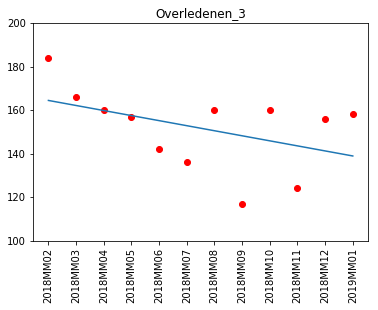

In [4]:
d = data[columns['Overledenen_3']][-13:-1]
all_data('Overledenen_3')
plot_plot("Overledenen_3", d)

Levend geboren kinderen

LevendGeborenKinderen_2
[381, 389, 407, 392, 423, 423, 457, 450, 389, 369, 407]
Gemiddelde: 407.90909090909093
Modus: [389, 407, 423]
Mediaan: (389, 2)
Standaard deviatie: 26.70530946682716
------------------------------


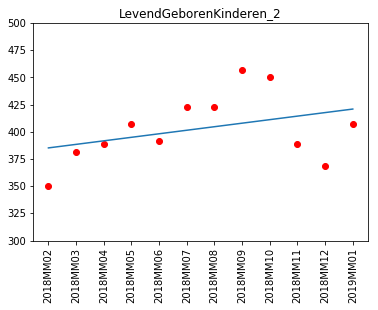

In [3]:
d = data[columns['LevendGeborenKinderen_2']][-13:-1]
all_data('LevendGeborenKinderen_2')
plot_plot("LevendGeborenKinderen_2", d)